In [2]:
pip install markovify

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 1.7 MB/s eta 0:00:00
  Created wheel for markovify: filename=markovify-0.9.4-py3-none-any.whl size=18606 sha256=3191994df980b1efc874721700126bcae658e73de3910e9a24966ee52f749776
  Stored in directory: /root/.cache/pip/wheels/ca/8c/c5/41413e24c484f883a100c63ca7b3b0362b7c6f6eb6d7c9cc7f
Successfully built markovify


In [7]:
# Get raw text as string.
with open("qa-jokes.txt") as f:
    raw_text = f.read()

# Display the first 10 lines of the text file
print("First 5 QnA of the text file:")
print('\n'.join(raw_text.split('\n')[:15]))

First 5 QnA of the text file:
Q:  What's the difference between a teacher and a train?
A:  A teacher says "no chewing" and a train says "choo-choo"!

Q:  What do you call a lion tamer who sticks his right arm down a lion's
    throat?
A:  Lefty!

Q:  What happens if you don't pay your exorcist?
A:  You get repossessed!

Q:  What kind of quiz do you give to a criminal?
A:  A con test!

Q:  Why aren't elephants allowed on beaches?
A:  They can't keep their trunks up!


In [8]:
import markovify
import spacy

# Load English language model for spacy
nlp = spacy.load("en_core_web_sm")

# preprocess the QnA format with meaningful structure
def preprocess_qa(text):
    # Split the text into lines
    lines = text.split('\n')

    # Separate questions and answers
    questions = [line[3:] for line in lines if line.startswith('Q:')]
    answers = [line[3:] for line in lines if line.startswith('A:')]

    # Combine questions and answers into a list of tuples
    qa_pairs = list(zip(questions, answers))

    return qa_pairs

# generate sentences with meaningful structure using spacy
def generate_sentence(model, start):
    sentence = model.make_sentence(tries=200)
    while not sentence or start not in sentence:
        sentence = model.make_sentence(tries=200)
    return sentence

# Preprocess the raw text
qa_pairs = preprocess_qa(raw_text)

# Build separate models for questions and answers.
question_model = markovify.NewlineText('\n'.join(['Q: ' + q for q, _ in qa_pairs]))
answer_model = markovify.NewlineText('\n'.join(['A: ' + a for _, a in qa_pairs]))

# Print 30 randomly-generated QnA jokes with meaningful structure
for i in range(30):
    # Generate a question and an answer separately
    question = generate_sentence(question_model, 'Q:')
    answer = generate_sentence(answer_model, 'A:')

    # Use spacy to ensure grammatical coherence
    question_doc = nlp(question)
    answer_doc = nlp(answer)

    print(question)
    print(answer)
    print()


Q: What do you call a basement full of married people really empty?
A: Because they don't celebrate Thanksgiving!

Q: What do you get if you cross a nun with an Blonde man???
A: As fur as you can eat under a buck.

Q: What do you make fun of fat people?
A: To get to Mexico, where they don't know the route.

Q: What did the lions say when the outlaw carry a bottle of glue when he threw a stone in the morning?
A: So you don't have to much trouble fitting it on the other stops the nose!

Q: Why does a train do when an outlaw armed with four loaded revolvers?
A: To get to Mexico, where they don't get a concussion while bobbing their from head side to

Q: How can you tell when a bell is obedient?
A: The brunette. The blonde would have to retrain them every Monday.

Q: What was the biggest holdup in history?
A: They keep getting their head stuck in a trap, chewed off three legs and was still stuck.

Q: What does a blonde does after sex?
A: It makes a little Bigger!

Q: What do you drown a bl

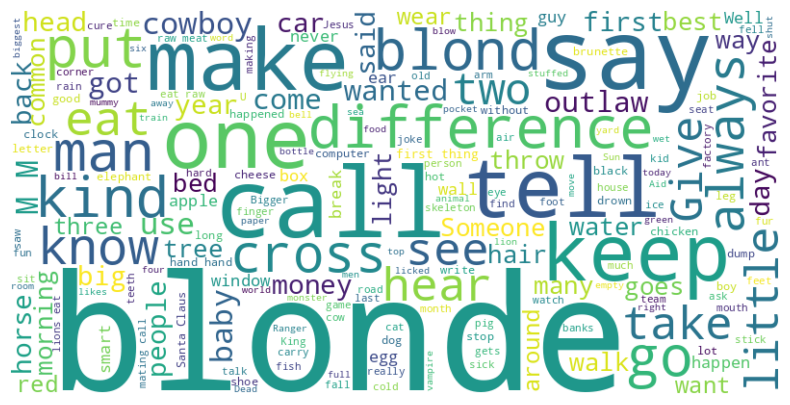

In [5]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Extract all words from the Q&A dataset for visualization
all_text = '\n'.join([q + '\n' + a for q, a in qa_pairs])

# Generate a Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
